In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import importlib
sys.path.append('../')

import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\USUARIO\\Desktop\\Projects\\4Geeks_temporal_series\\src\\water_spring\\..\\utils.py'>

In [3]:
df = pd.read_csv('../../data/raw/Water_Spring_Madonna_di_Canneto.csv')
df = utils.turn_column_into_date(df, 'Date')
df.head()

,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
Date,,,
2012-01-01,0.0,5.25,NaN
2012-01-02,5.6,6.65,NaN
2012-01-03,10.0,8.85,NaN
2012-01-04,0.0,6.75,NaN
2012-01-05,1.0,5.55,NaN


# Valores faltantes

In [4]:
utils.get_null_percentage_per_column(df)

Flow_Rate_Madonna_di_Canneto    55.444908
Rainfall_Settefrati             17.860585
Temperature_Settefrati          17.860585
dtype: float64

In [5]:
df = utils.remove_columns_with_nulls_percent(df, threshold=50)
df = utils.interpolate_df(df)

Columnas eliminadas por alto porcentaje de valores nulos (50%): ['Flow_Rate_Madonna_di_Canneto']
Valores nulos después de la interpolación:
Series([], dtype: int64)


c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\water_spring\..\utils.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Relleno hacia adelante
c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\water_spring\..\utils.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Relleno hacia atrás


In [6]:
utils.get_null_percentage_per_column(df)

Rainfall_Settefrati       0.0
Temperature_Settefrati    0.0
dtype: float64

# Análisis de tendencias

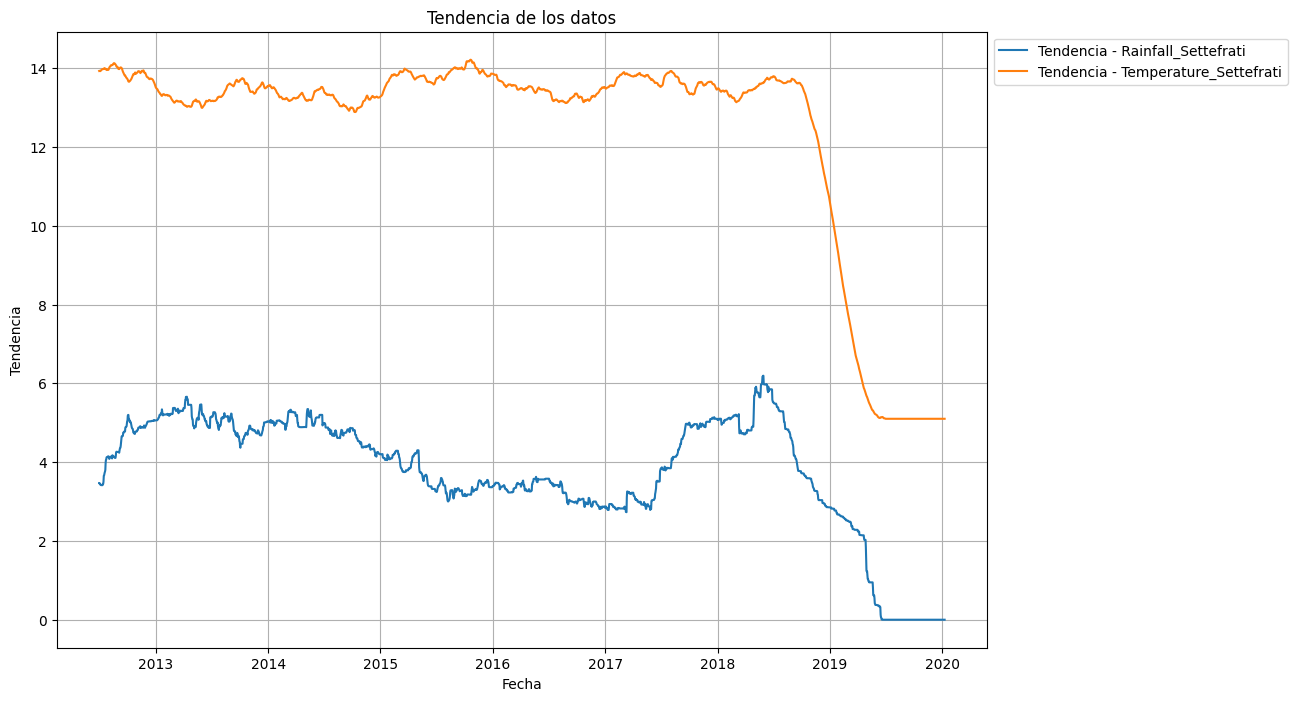

In [7]:
utils.plot_trend(df, period=365)

# Análisis de estacionalidad

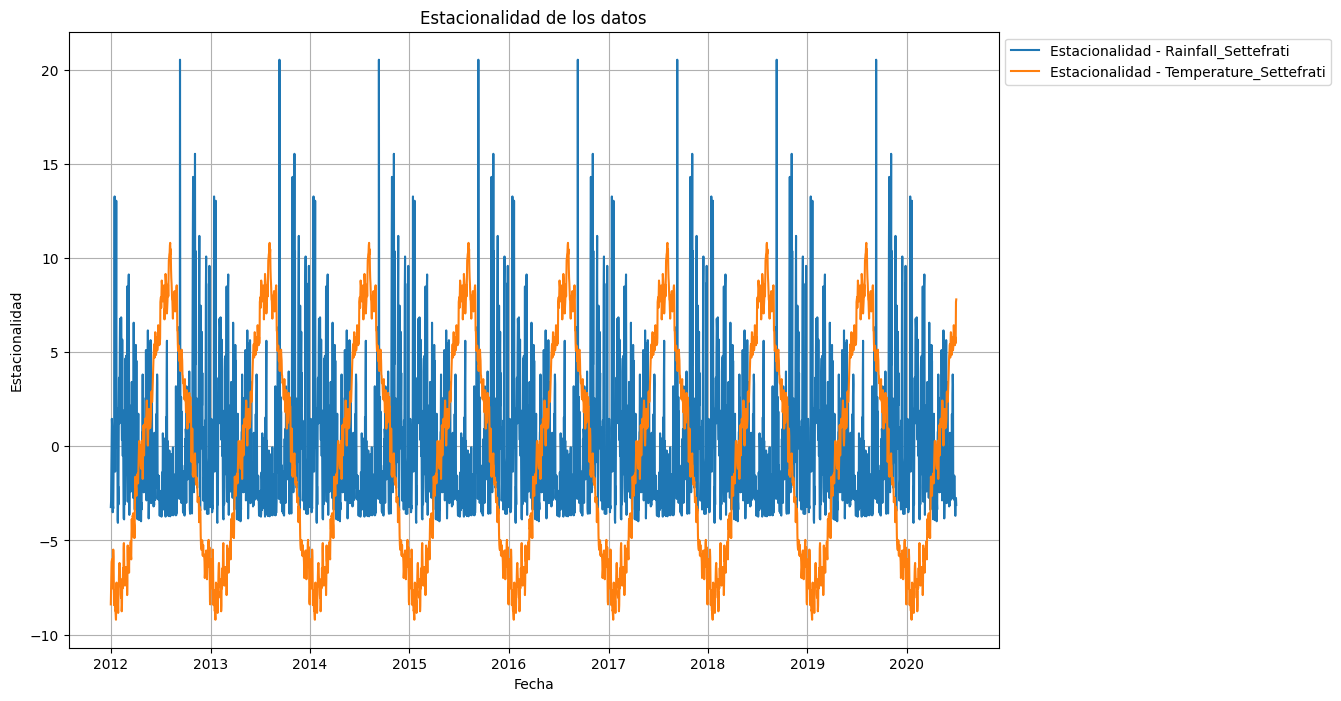

In [8]:
utils.plot_seasonality(df, period=365)

# Prueba de estacionariedad

In [9]:
utils.test_stationarity(df)

Resultados de la prueba de Dickey-Fuller para 'Rainfall_Settefrati':
Test Statistic                -7.761349e+00
p-value                        9.436397e-12
#Lags Used                     2.700000e+01
Number of Observations Used    3.085000e+03
Critical Value (1%)           -3.432471e+00
Critical Value (5%)           -2.862477e+00
Critical Value (10%)          -2.567269e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Temperature_Settefrati':
Test Statistic                   -3.037302
p-value                           0.031555
#Lags Used                       14.000000
Number of Observations Used    3098.000000
Critical Value (1%)              -3.432463
Critical Value (5%)              -2.862473
Critical Value (10%)             -2.567267
dtype: float64
--------------------------------------------------------------------------------


# Análisis de variabilidad

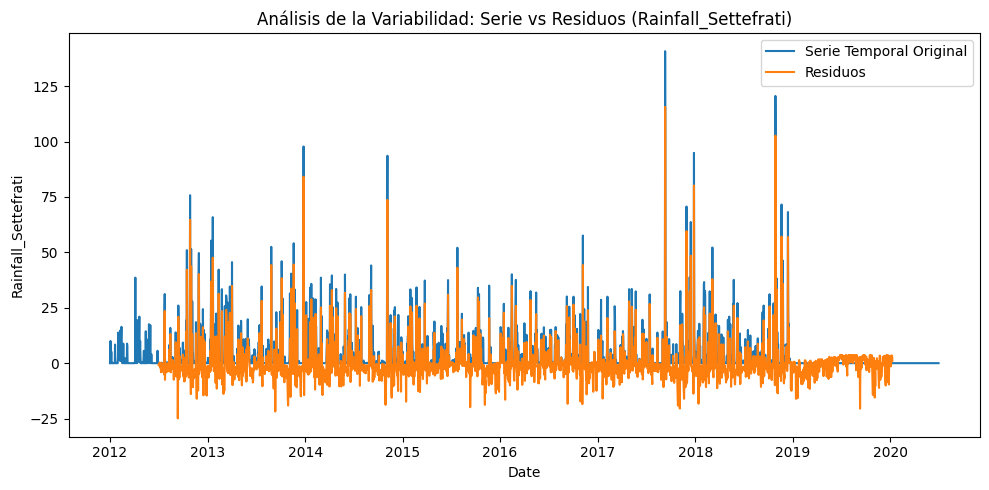

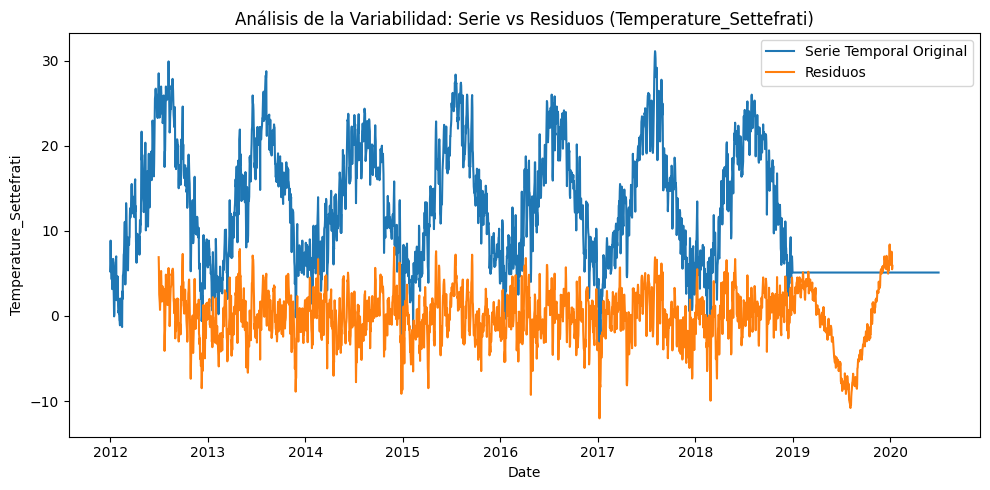

In [10]:
utils.plot_variability(df, period=365)

# Análisis de autocorrelación

<Figure size 1000x500 with 0 Axes>

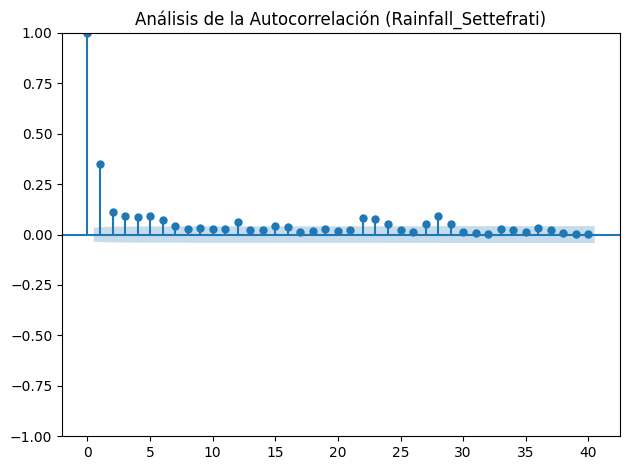

<Figure size 1000x500 with 0 Axes>

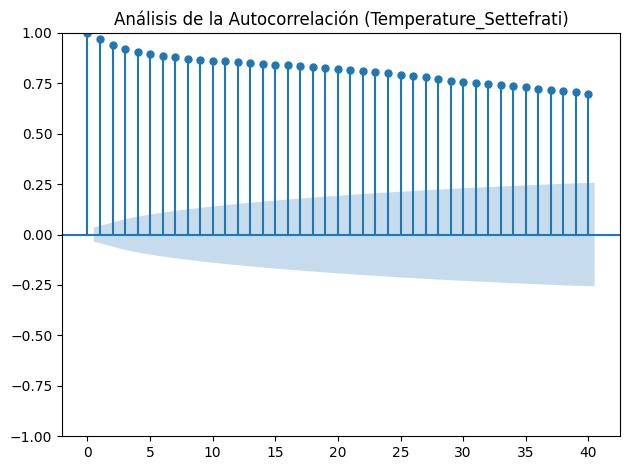

In [11]:
utils.plot_autocorrelation(df)

In [12]:
df = df.rename(columns={"Rainfall_Settefrati": "Rainfall"})

In [13]:
df.to_csv("../../data/processed/water_spring_madonna.csv", index=True)